Importing packages and downloading data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

schoolData = pd.read_csv('Map_of_Schools.csv')
bikeData = pd.read_csv('Bicycle_Parking.csv')



Parsing Latitude and Longitude for school data

In [ ]:
schoolDataLatLog = schoolData['Location 1'].str.strip('CA').str.strip('\n').str.strip('()')                               \
                   .str.split(', ', expand=True)                   \
                   .rename(columns={0:'Latitude', 1:'Longitude'})

schoolData['Latitude1'] = pd.to_numeric(schoolDataLatLog.iloc[:, 0])

schoolData['Longitude1'] = pd.to_numeric(schoolDataLatLog.iloc[:, 1])

Merging data and filtering for bike racks that are within .001 lattitude/longitude from schools. Also splitting public and private schools.

In [6]:
mergedTable = pd.merge(schoolData, bikeData, how='cross')

filter1 = mergedTable['LAT'] - .0005 <= mergedTable['Latitude1']
filter2 = mergedTable['Latitude1'] <= mergedTable['LAT'] + .0005

filter3 = mergedTable['LON'] - .0005 <= mergedTable['Longitude1']
filter4 = mergedTable['Longitude1'] <= mergedTable['LON'] + .0005

mergedTableFiltered = mergedTable[filter1]
mergedTableFiltered = mergedTableFiltered[filter2]
mergedTableFiltered = mergedTableFiltered[filter3]
mergedTableFiltered = mergedTableFiltered[filter4]

filterPrivate = mergedTableFiltered['CCSF Entity'] == "Private"
filterNotPricate = mergedTableFiltered['CCSF Entity'] != "Private"

Private = mergedTableFiltered[filterPrivate]
NotPrivate = mergedTableFiltered[filterNotPricate]

/var/folders/2_/_fl36cg12ql3zcpfpz55yr040000gn/T/ipykernel_62102/107832249.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mergedTableFiltered = mergedTableFiltered[filter2]
/var/folders/2_/_fl36cg12ql3zcpfpz55yr040000gn/T/ipykernel_62102/107832249.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mergedTableFiltered = mergedTableFiltered[filter3]
/var/folders/2_/_fl36cg12ql3zcpfpz55yr040000gn/T/ipykernel_62102/107832249.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mergedTableFiltered = mergedTableFiltered[filter4]


Making graph for Private/Public breakdown of number of bike racks that are close to them

Text(0, 0.5, '# of bike racks near school type')

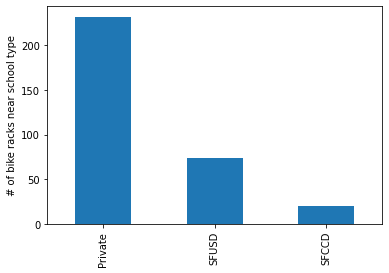

In [8]:
mergedTableFiltered['CCSF Entity'].value_counts().plot(kind='bar');
plt.ylabel("# of bike racks near school type")

Also showing number of bike racks near level of education

Text(0, 0.5, '# of bike racks near education type')

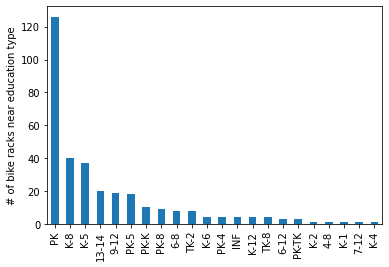

In [9]:
mergedTableFiltered['Grade Range'].value_counts().plot(kind='bar');
plt.ylabel("# of bike racks near education type")

For this project, I attempted to find out whether bike racks in the city of San Franscisco favored private schools in terms of location over public schools. My thought process inlcuded the following: first, collecting and cleaning the data sets (which included parsing latitude and longitude into their own columns), then determining which bike racks were 'near' all schools by doing a cross join of the two data sets then filtering out the ones that were too far, then showing a bar graph which displayed that private schools had an overwheling majority of the 'near' bike racks.

For this, I performed a Chi-squared test with 236 bike racks near privates and 94 near publics, with expected even split at 163 apiece. This gave me a chi sqared value fo 58.417 with 1 degree of freedom and a two-tailed p-value less than 0.0001. This means that this was extremely statistically significant.

Secondly, I make a graph that shows number of bike racks close to each level of education. While I would have liked to breakdown the x-axis more until it was more comprehensive groups, I did not have time, but it was clear from this preliminary analysis that the majority of bike racks were closer to Pre-K schools. This was also statisically significant according to the Chi-squared test.

In conclusion, we can say that private schools definetly have more access to bike racks in the city of San Franscisco, which would be a cause for concern and a possible target to public policy. This is because many public school students tend to have lower family income than private school students so they would be more likely to ride a bike to school rather than drive. Additionally, the education level breakdown shows that most of the bike racks are poorly placed as Pre-K is not the intended target consumer for most bike racks.

Assumptions: I assumed 'near' for a bike rack was within .001 latitude and longitude (.0005 in either direction). 